In [1]:
from natural_pdf import PDF
import pandas as pd

[2025-06-17 16:38:45,700] [ WARNING] surya.py:27 - Could not import Surya dependencies (layout and/or table_rec): No module named 'surya.common'


In [ ]:
#Processing the first few pdfs to make sure the boxes are extracting correctly

[2025-08-12 12:16:07,416] [ WARNING] surya.py:27 - Could not import Surya dependencies (layout and/or table_rec): No module named 'surya.common'


Processing: 1_-_DI_CA_Test.pdf
Processing: 2007_FSR.pdf
Processing: Abilene_Christian_University.pdf
Processing: Alabama_A&M_University.pdf
Processing: Alabama_State_University.pdf


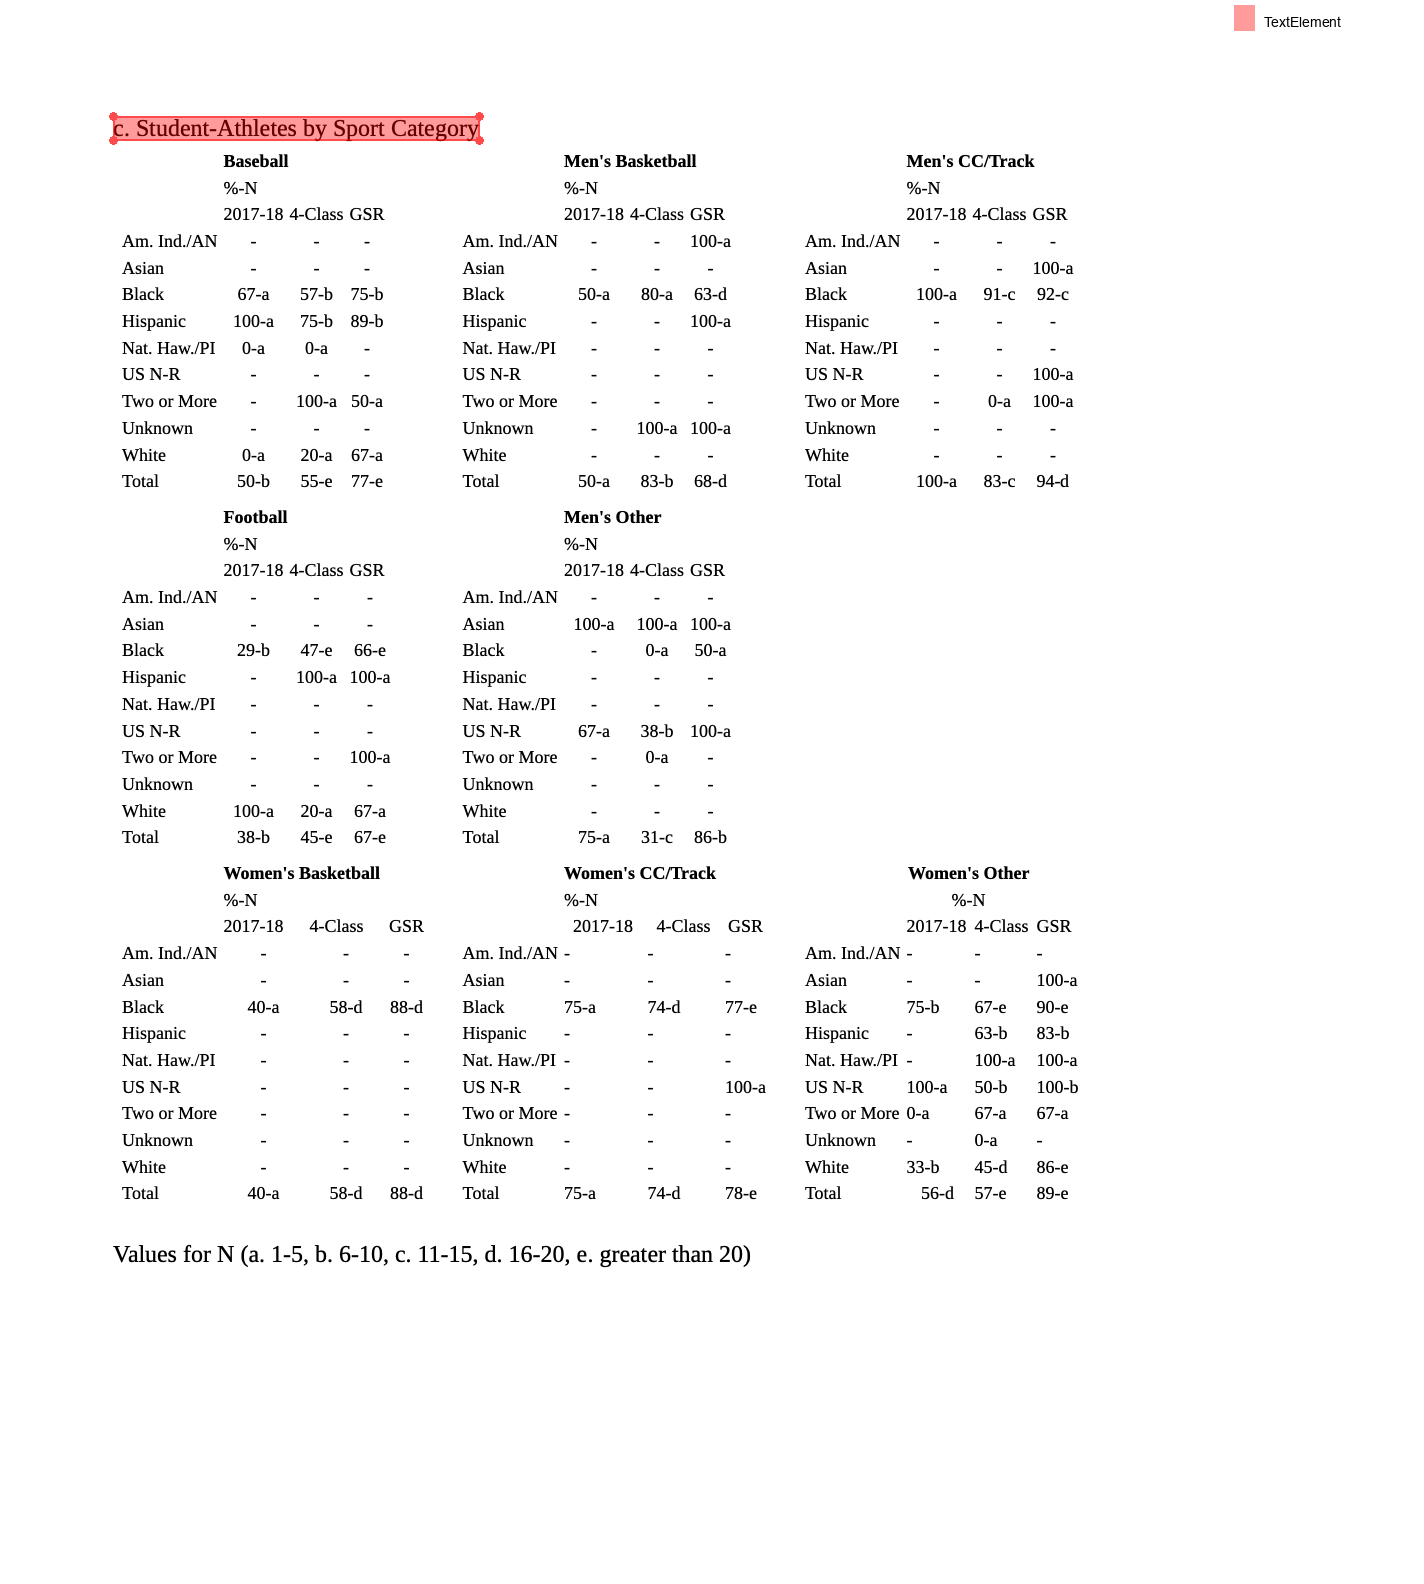

In [1]:
import os

pdf_folder = "pdfs"

pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])[:5]

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    print(f"Processing: {filename}")
    
    pdf = PDF(filepath)
    
    if not pdf.pages:
        print("No pages found in this PDF.")
        continue
    
    page = pdf.pages[0]
    
page = pdf.pages[1]
page.find("text").show()


In [ ]:
#Creating bouding boxes to be extracted 

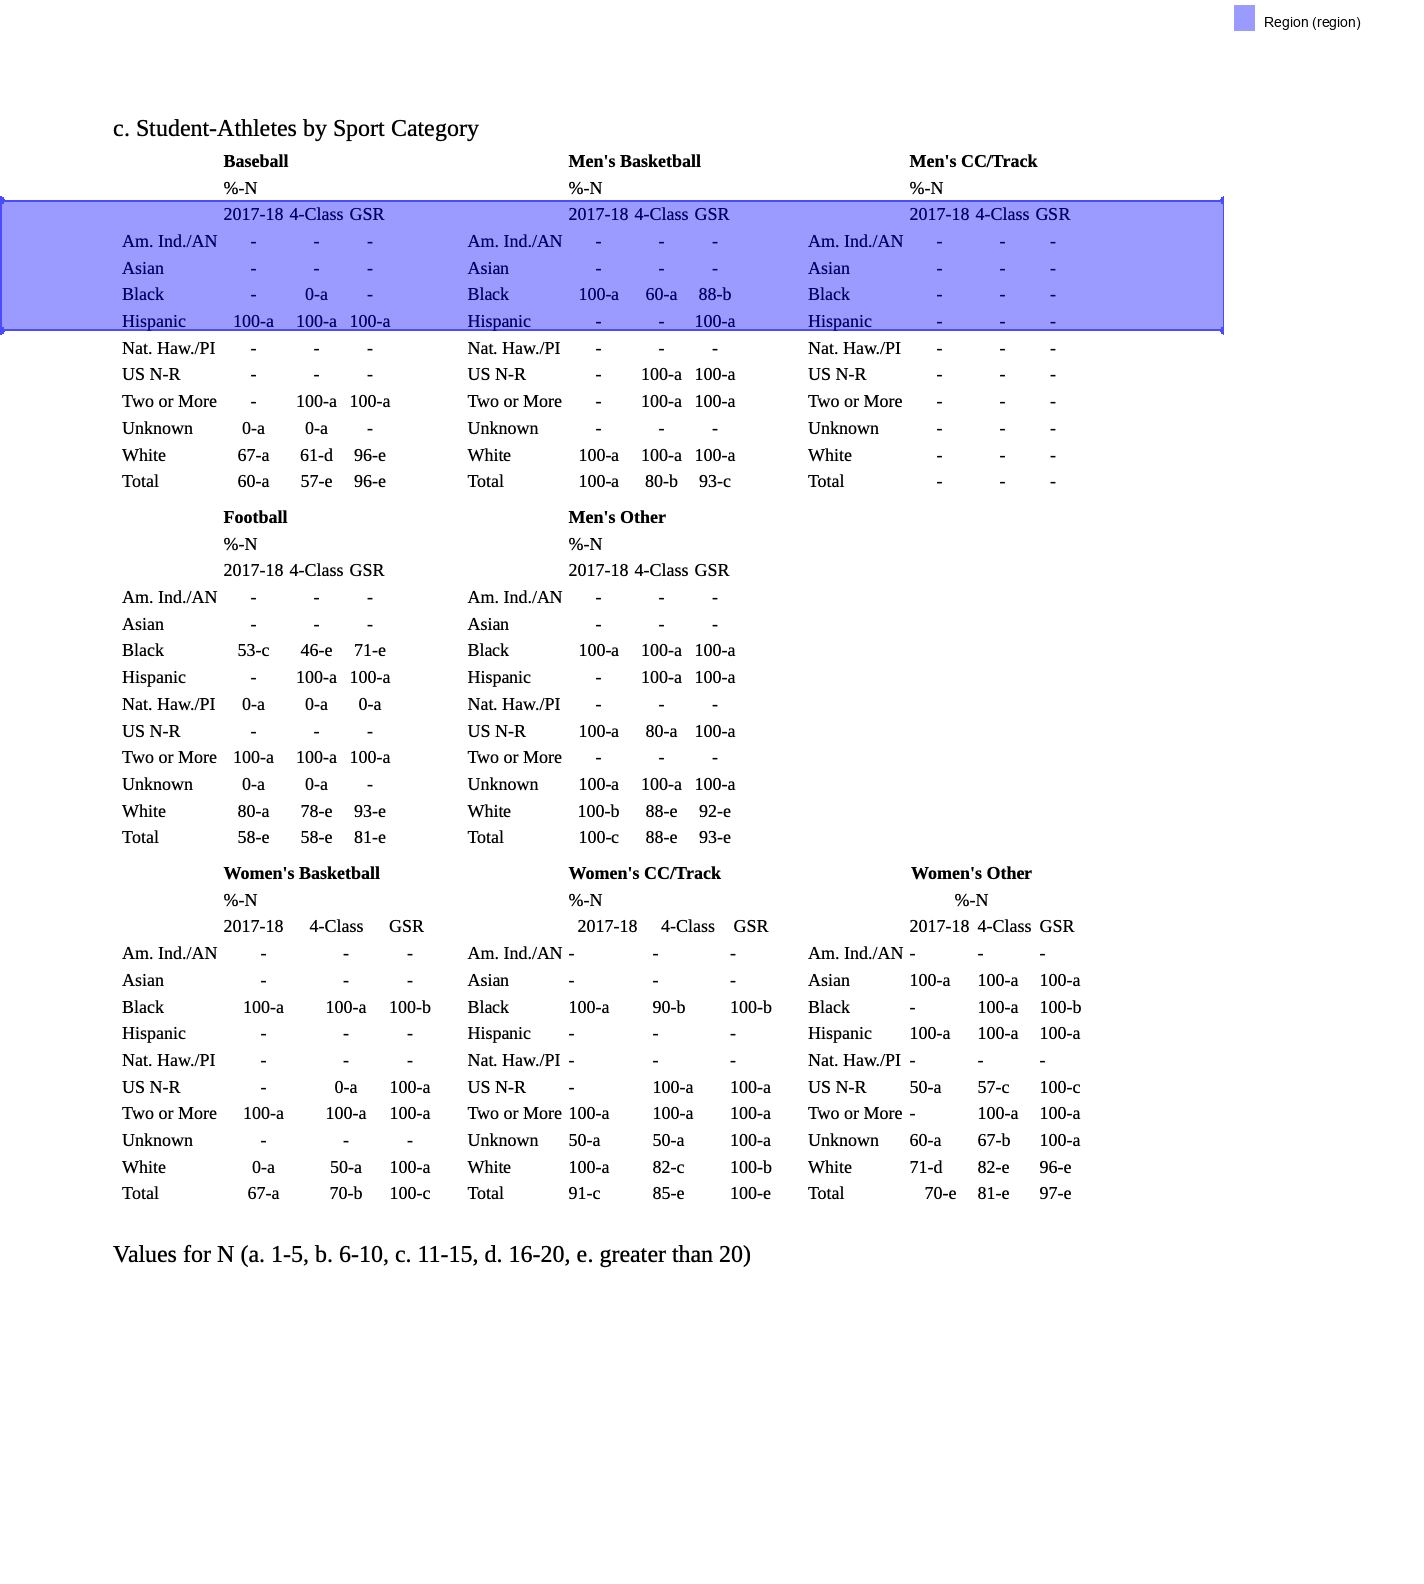

In [38]:
top_table = page.region(top=100, height=65)
top_table.show()

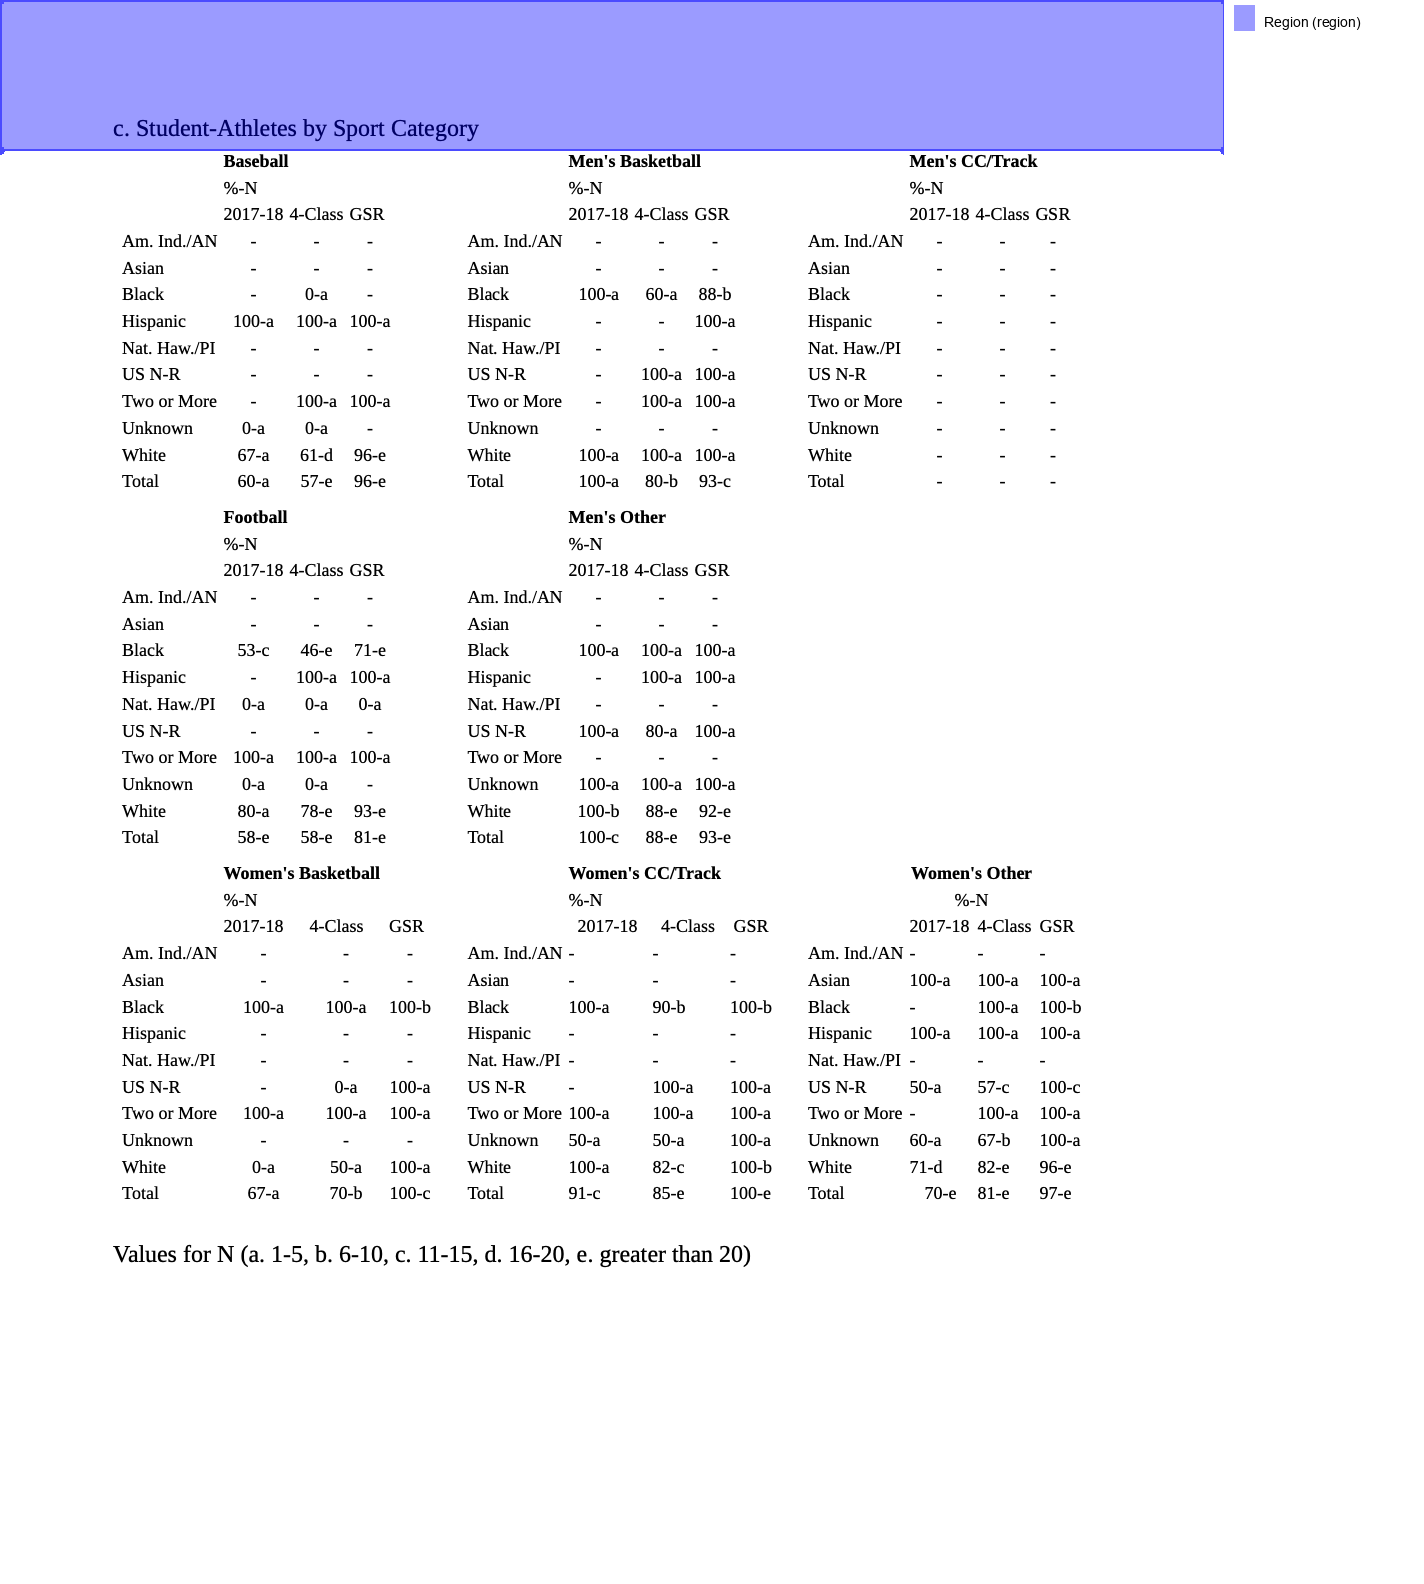

In [39]:
(
    page
    .find(text='Baseball')
    .above(until='text:contains("Football")')
    .show()
)

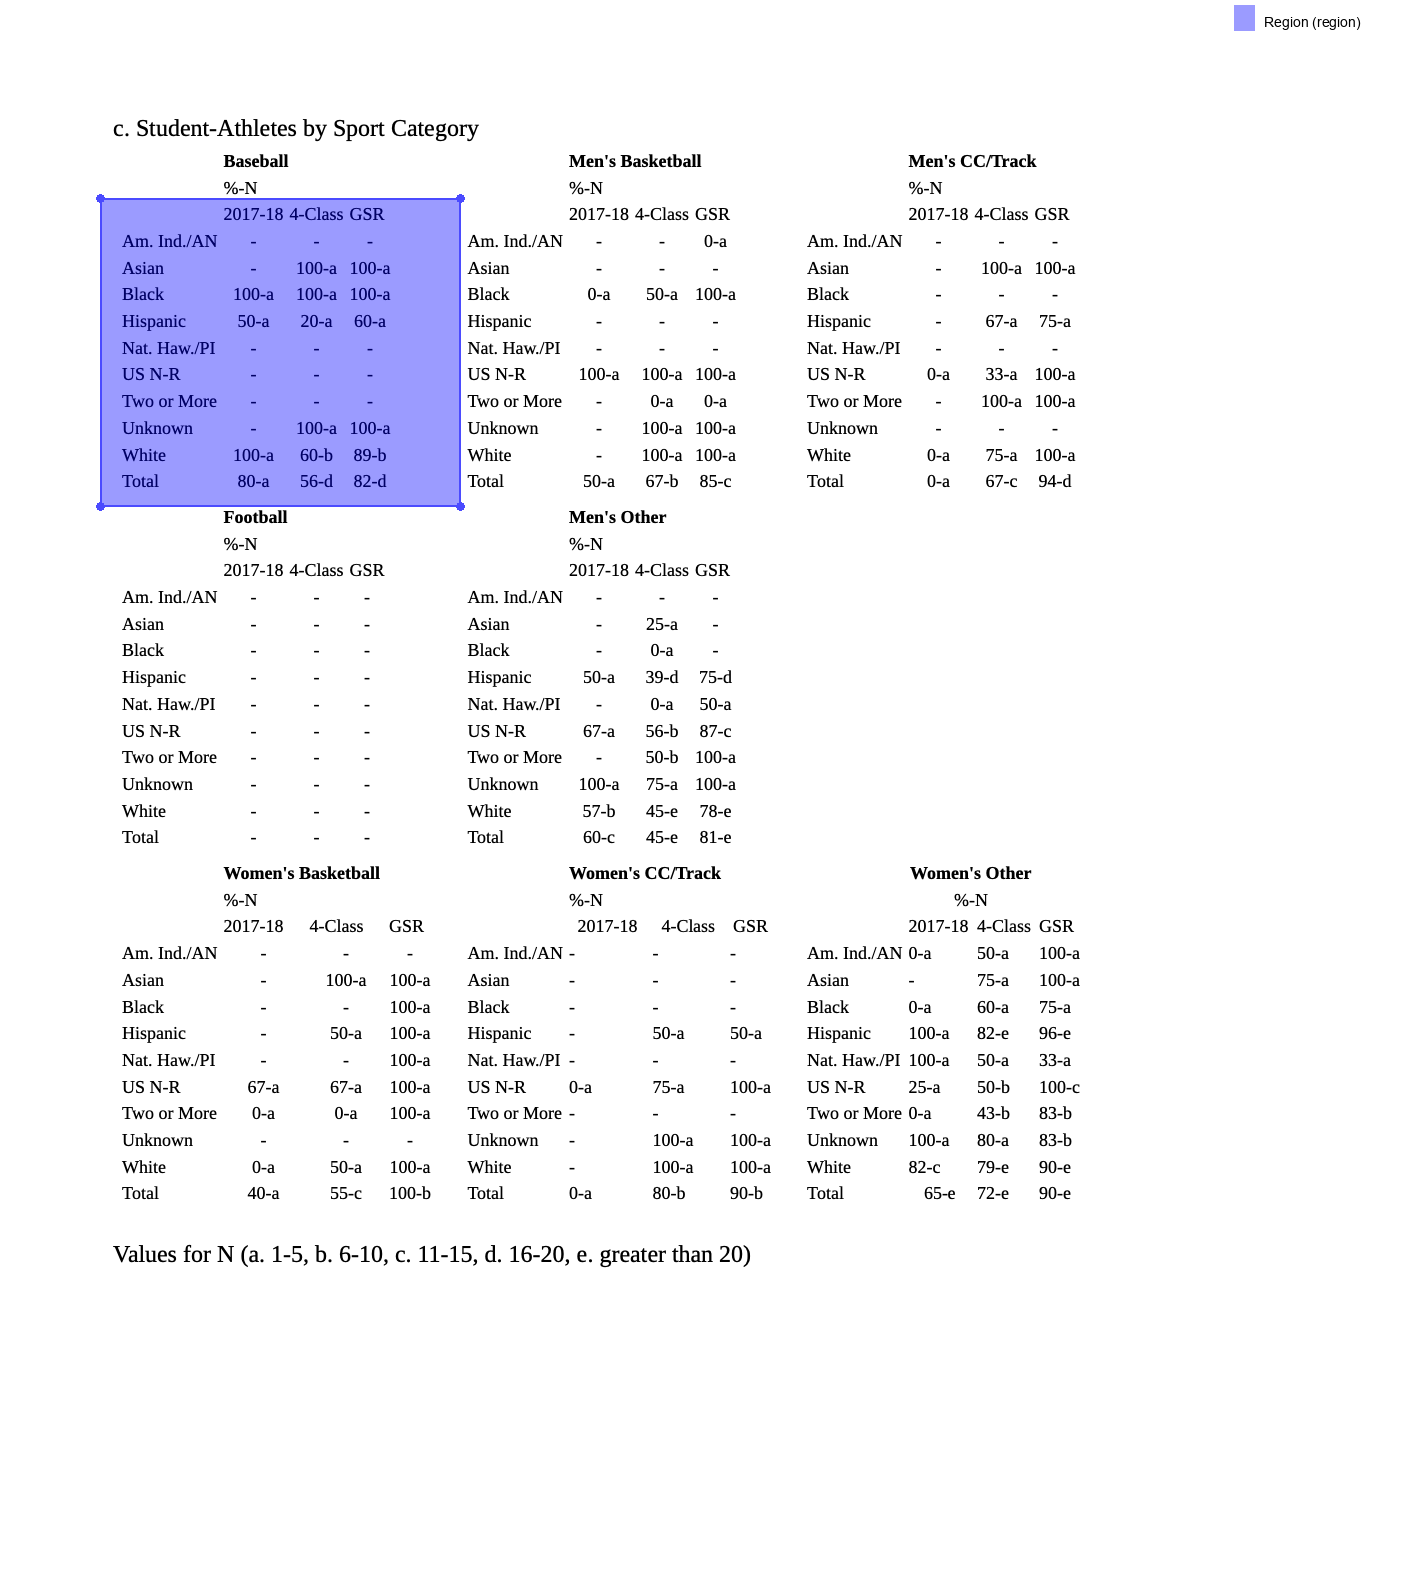

In [52]:
(
    page
    .find(text='Baseball')
    .below().find(text='%-N')
    .below(
        until='text:contains("Football")',
        include_endpoint=False
    )
    .clip(left=50, right=230)
    .show()
)

In [ ]:
#Scraping the first 20, as a practice; creating bounding boxes for each category as they do not pull correctly together

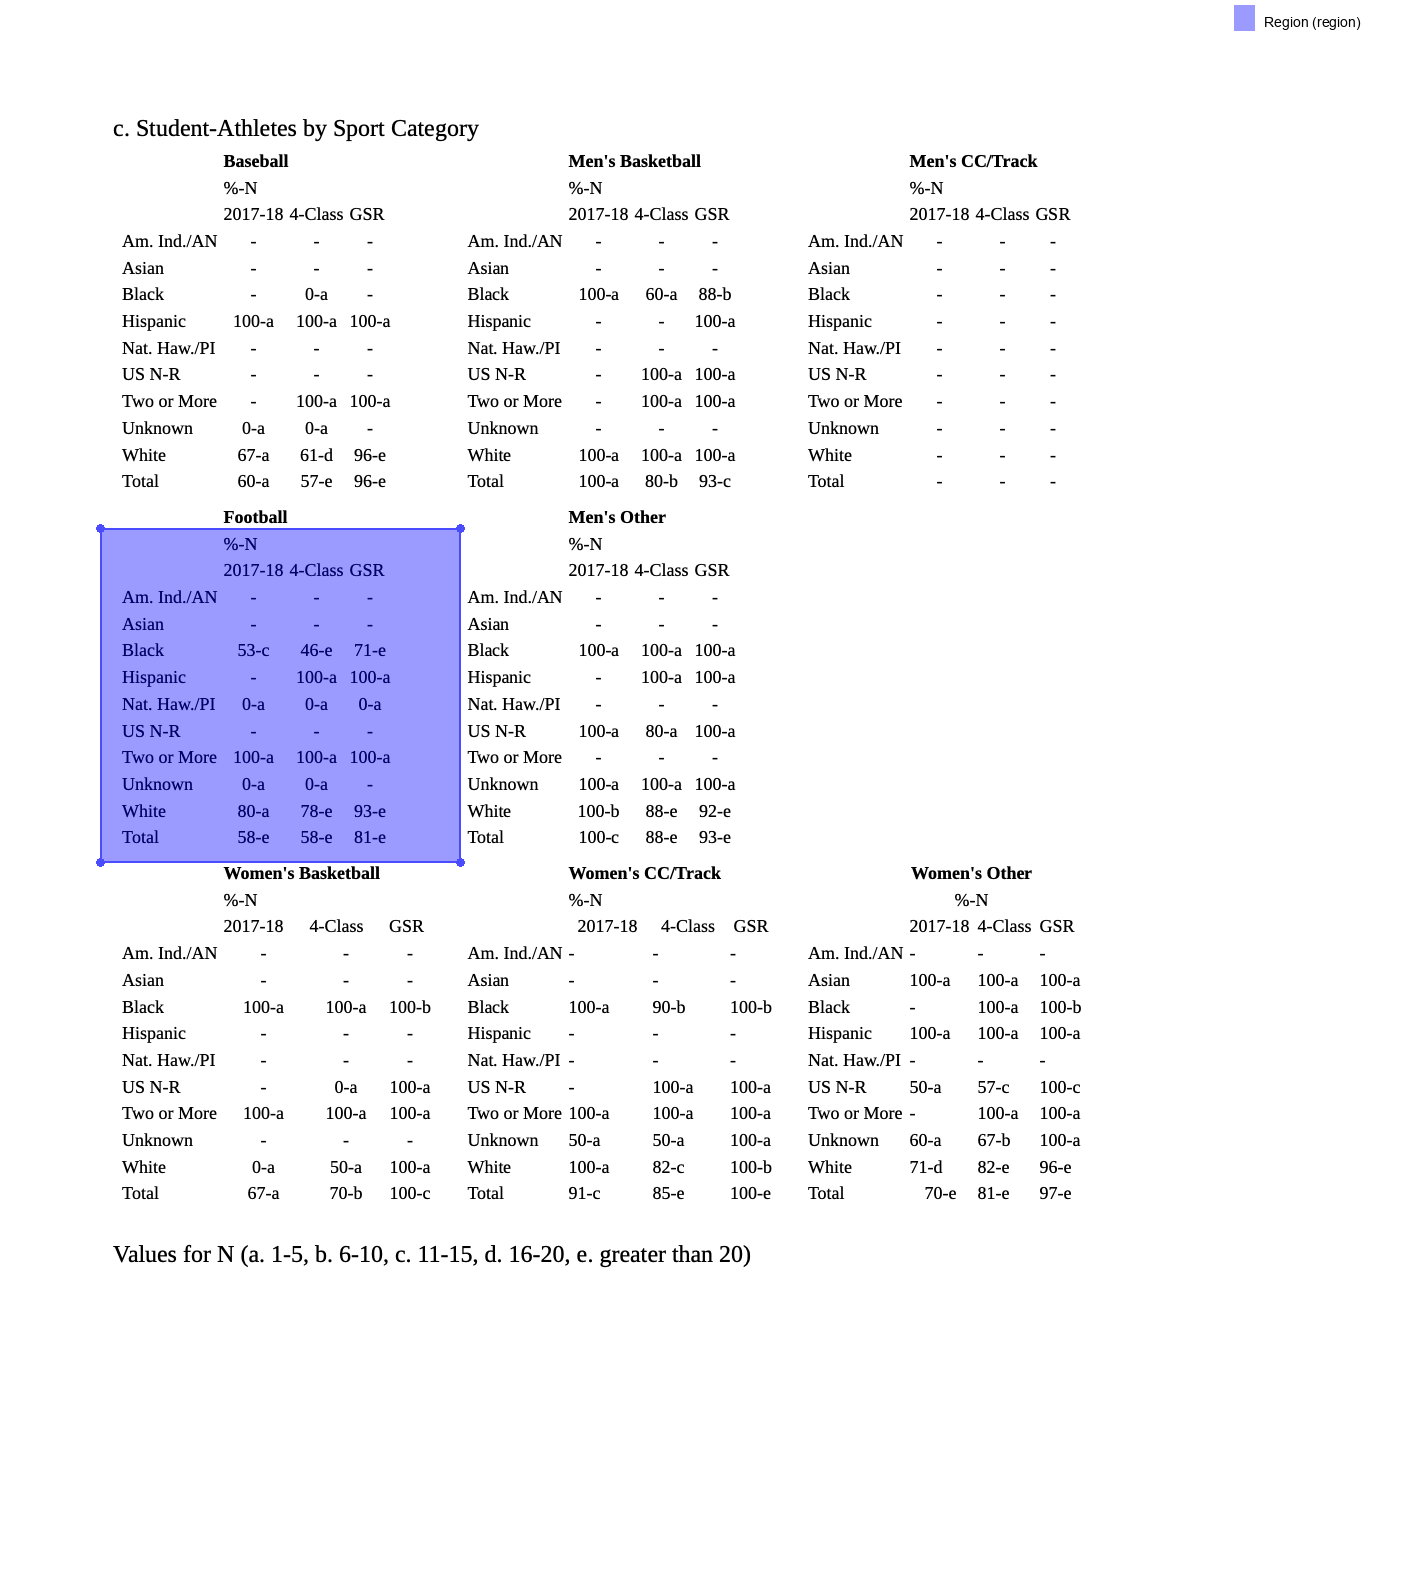

In [75]:
(
    page
    .find("text:contains('Football')")
    .below(
        until="text:contains(\"Women's Basketball\")",
        include_endpoint=False
    )
    .clip(left=50, right=230)
    .show()
)


In [ ]:
#First 20 for Football

In [3]:
def extract_school_name(filename):
    return filename.replace(".pdf", "").replace("_", " ").strip()

def extract_football_table(pdf, school_name):
    try:
        page = pdf.pages[1] 
        clipped = (
            page
            .find("text:contains('Football')")
            .below(until="text:contains(\"Women's Basketball\")", include_endpoint=False)
            .clip(left=50, right=230)
        )
        rows = clipped.extract_table()
        if not rows or len(rows) < 2:
            return None

        full_header = ["Race", "%N", "2017-18", "4-Class", "GSR"]
        cleaned_data = []
        for row in rows:
            row = [cell.strip() if isinstance(cell, str) else "" for cell in row]
            if len(row) < 2:
                continue
            row_padded = row[:5] + [""] * (5 - len(row))
            cleaned_data.append({
                "School": school_name,
                "Sport": "Football",
                "Race": row_padded[0],
                "%N": row_padded[1],
                "2017-18": row_padded[2],
                "4-Class": row_padded[3],
                "GSR": row_padded[4],
            })
        return cleaned_data
    except Exception as e:
        print(f"Error extracting Football for {school_name}: {e}")
        return None

pdf_folder = "pdfs"
pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])[:20]
all_football_rows = []

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    school_name = extract_school_name(filename)
    try:
        pdf = PDF(filepath)
        if len(pdf.pages) < 2:
            print(f"{school_name} does not have enough pages.")
            continue
        df_rows = extract_football_table(pdf, school_name)
        if df_rows:
            all_football_rows.extend(df_rows)
            print(f"Extracted Football for {school_name}")
        else:
            print(f" No valid data for {school_name}")
    except Exception as e:
        print(f"Failed to process {school_name}: {e}")
if all_football_rows:
    df_final = pd.DataFrame(all_football_rows)
    output_csv = "page2_football_by_race_first20.csv"
    df_final.to_csv(output_csv, index=False)
    print(f"Saved to {output_csv}")
else:
    print("No valid data extracted.")

Extracted Football for 1 - DI CA Test
Extracted Football for 2007 FSR


KeyboardInterrupt: 

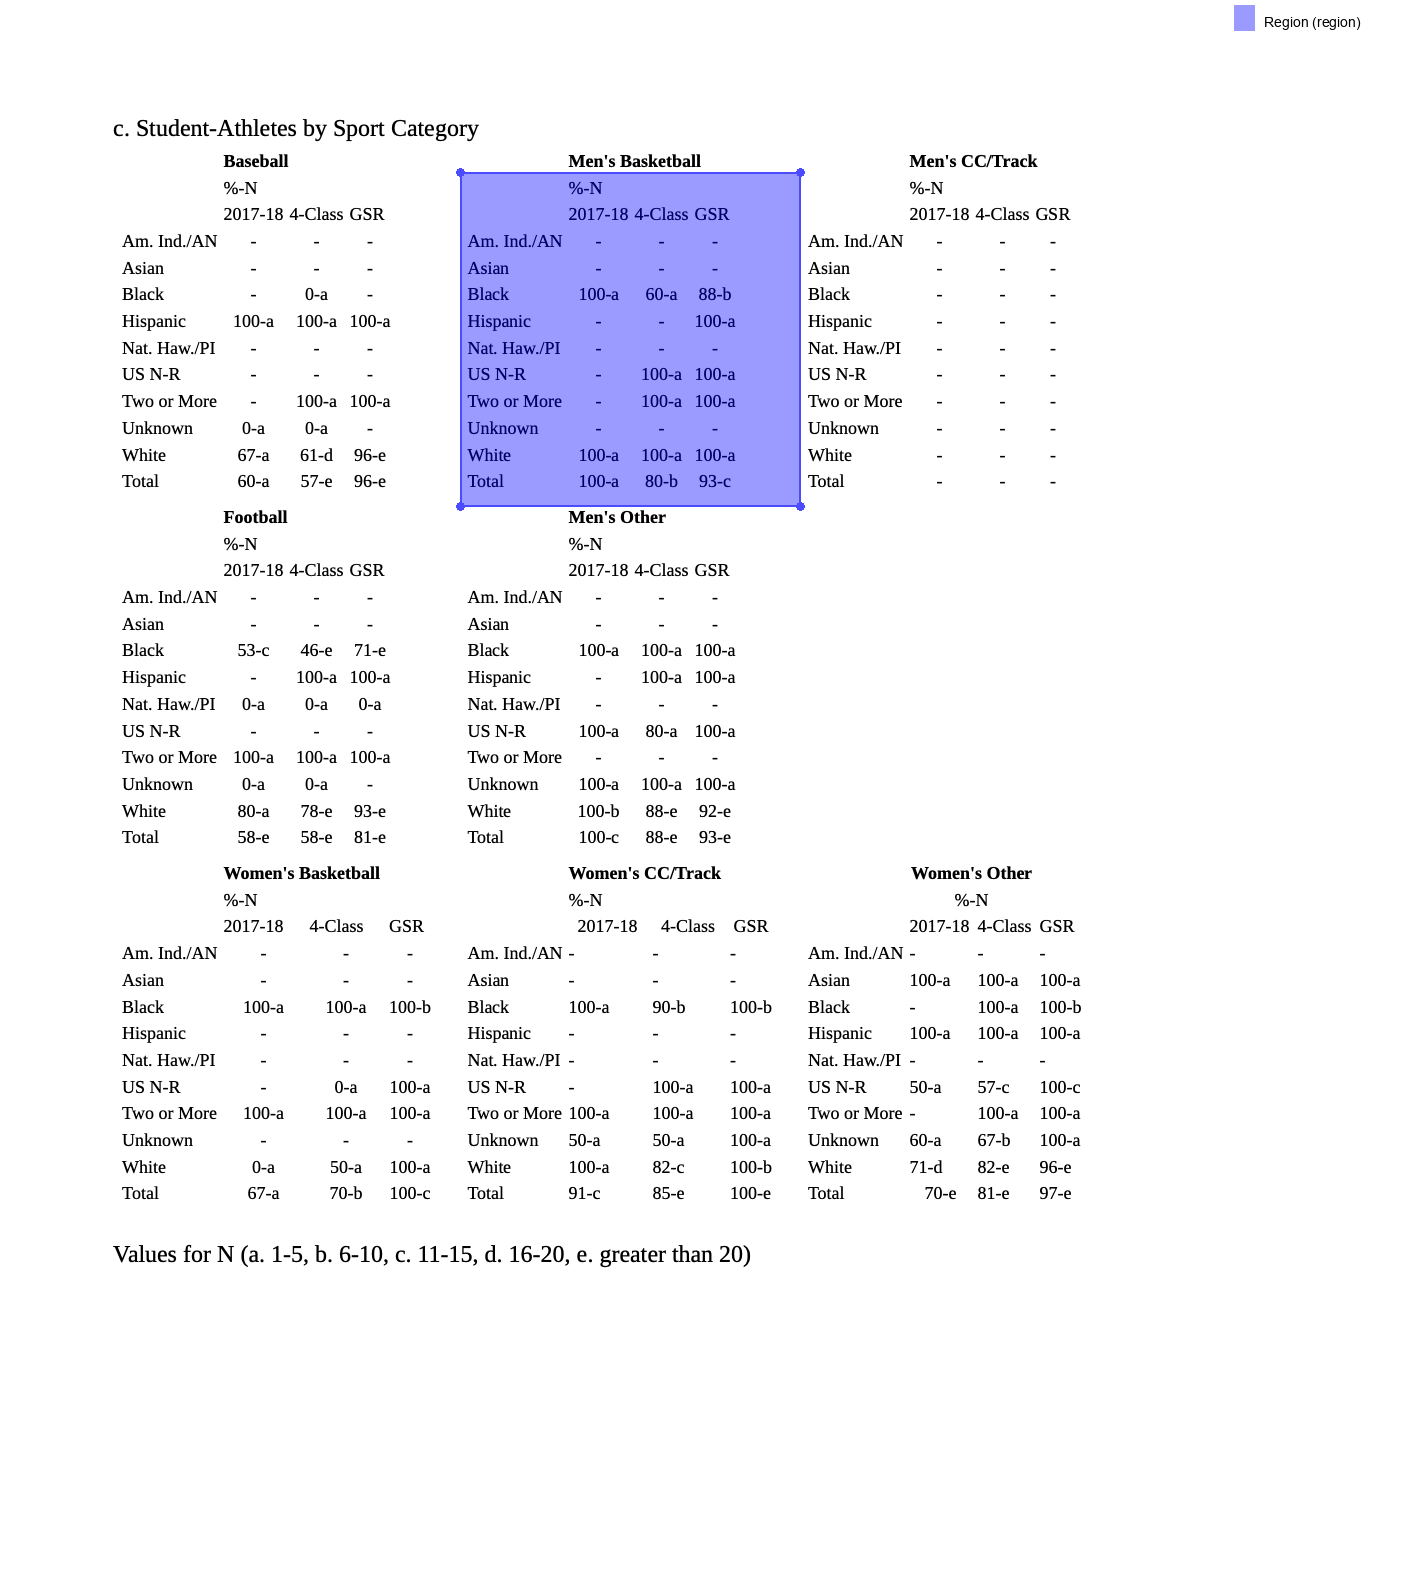

In [85]:
(
    page
    .find("text:contains(\"Men's Basketball\")")
    .below(
        until="text:contains(\"Men's Other\")",
        include_endpoint=False
    )
    .clip(left=230, right=400)
    .show()
)


In [ ]:
#First 20 for Men's Basketball

In [4]:
def extract_school_name(filename):
    return filename.replace(".pdf", "").replace("_", " ").strip()

def extract_mens_basketball_table(pdf, school_name):
    try:
        page = pdf.pages[1] 
        clipped = (
            page
            .find('text:contains("Men\'s Basketball")')
            .below(until='text:contains("Men\'s Other")', include_endpoint=False)
            .clip(left=230, right=400)
        )
        rows = clipped.extract_table()
        if not rows or len(rows) < 2:
            return None

        full_header = ["Race", "%N", "2017-18", "4-Class", "GSR"]
        cleaned_data = []
        for row in rows:
            row = [cell.strip() if isinstance(cell, str) else "" for cell in row]
            if len(row) < 2:
                continue
            row_padded = row[:5] + [""] * (5 - len(row))
            cleaned_data.append({
                "School": school_name,
                "Sport": "Men's Basketball",
                "Race": row_padded[0],
                "%N": row_padded[1],
                "2017-18": row_padded[2],
                "4-Class": row_padded[3],
                "GSR": row_padded[4],
            })
        return cleaned_data
    except Exception as e:
        print(f"Error extracting Men's Basketball for {school_name}: {e}")
        return None

pdf_folder = "pdfs"
pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])[:20]
all_mens_basketball_rows = []

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    school_name = extract_school_name(filename)
    try:
        pdf = PDF(filepath)
        if len(pdf.pages) < 2:
            print(f" {school_name} does not have enough pages.")
            continue
        df_rows = extract_mens_basketball_table(pdf, school_name)
        if df_rows:
            all_mens_basketball_rows.extend(df_rows)
            print(f"Extracted Men's Basketball for {school_name}")
        else:
            print(f" No valid data for {school_name}")
    except Exception as e:
        print(f"Failed to process {school_name}: {e}")

# === Save output ===
if all_mens_basketball_rows:
    df_final = pd.DataFrame(all_mens_basketball_rows)
    output_csv = "page2_mens_basketball_by_race_first20.csv"
    df_final.to_csv(output_csv, index=False)
    print(f"Saved to {output_csv}")
else:
    print("No valid data extracted.")


Extracted Men's Basketball for 1 - DI CA Test
Extracted Men's Basketball for 2007 FSR


KeyboardInterrupt: 

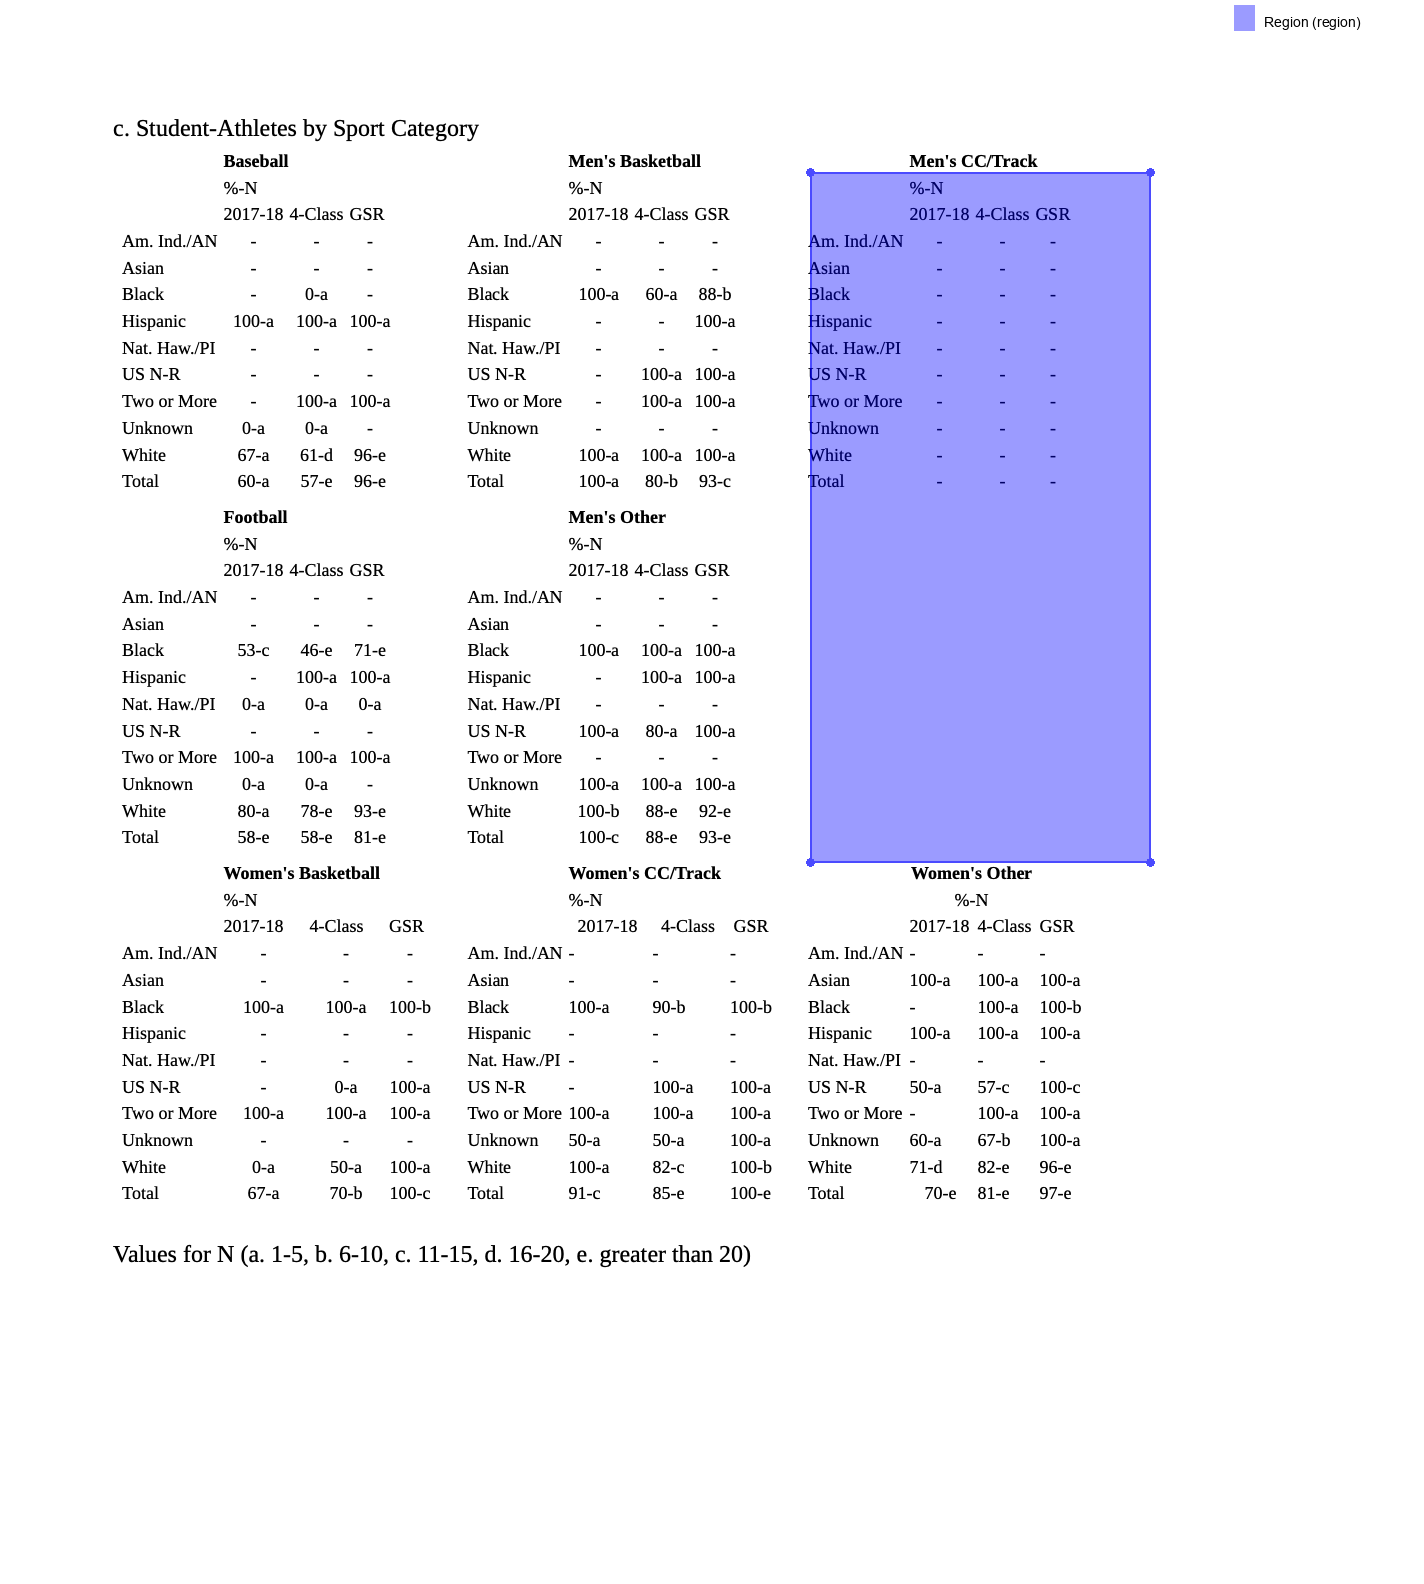

In [92]:
(
    page
    .find("text:contains(\"Men's CC/Track\")")
    .below(
        until="text:contains(\"Women's Other\")",
        include_endpoint=False
    )
    .clip(left=405, right=575)
    .show()
)


In [ ]:
#First 20 for Men's Track

In [5]:
def extract_school_name(filename):
    return filename.replace(".pdf", "").replace("_", " ").strip()

def extract_mens_cctrack_table(pdf, school_name):
    try:
        page = pdf.pages[1] 
        clipped = (
            page
            .find("text:contains(\"Men's CC/Track\")")
            .below(until="text:contains(\"Women's Other\")", include_endpoint=False)
            .clip(left=405, right=575)
        )
        rows = clipped.extract_table()
        if not rows or len(rows) < 2:
            return None

        full_header = ["Race", "%N", "2017-18", "4-Class", "GSR"]
        cleaned_data = []
        for row in rows:
            row = [cell.strip() if isinstance(cell, str) else "" for cell in row]
            if len(row) < 2:
                continue
            row_padded = row[:5] + [""] * (5 - len(row))
            cleaned_data.append({
                "School": school_name,
                "Sport": "Men's CC/Track",
                "Race": row_padded[0],
                "%N": row_padded[1],
                "2017-18": row_padded[2],
                "4-Class": row_padded[3],
                "GSR": row_padded[4],
            })
        return cleaned_data
    except Exception as e:
        print(f"Error extracting Men's CC/Track for {school_name}: {e}")
        return None

pdf_folder = "pdfs"
pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])[:20]
all_rows = []

for filename in pdf_files:
    filepath = os.path.join(pdf_folder, filename)
    school_name = extract_school_name(filename)
    try:
        pdf = PDF(filepath)
        if len(pdf.pages) < 2:
            print(f"{school_name} does not have enough pages.")
            continue
        df_rows = extract_mens_cctrack_table(pdf, school_name)
        if df_rows:
            all_rows.extend(df_rows)
            print(f"Extracted Men's CC/Track for {school_name}")
        else:
            print(f"No valid data for {school_name}")
    except Exception as e:
        print(f"Failed to process {school_name}: {e}")

if all_rows:
    df_final = pd.DataFrame(all_rows)
    output_csv = "page2_mens_cctrack_by_race_first20.csv"
    df_final.to_csv(output_csv, index=False)
    print(f"Done! Saved to {output_csv}")
else:
    print("No valid data extracted.")

Extracted Men's CC/Track for 1 - DI CA Test
Extracted Men's CC/Track for 2007 FSR
Extracted Men's CC/Track for Abilene Christian University
Extracted Men's CC/Track for Alabama A&M University


KeyboardInterrupt: 

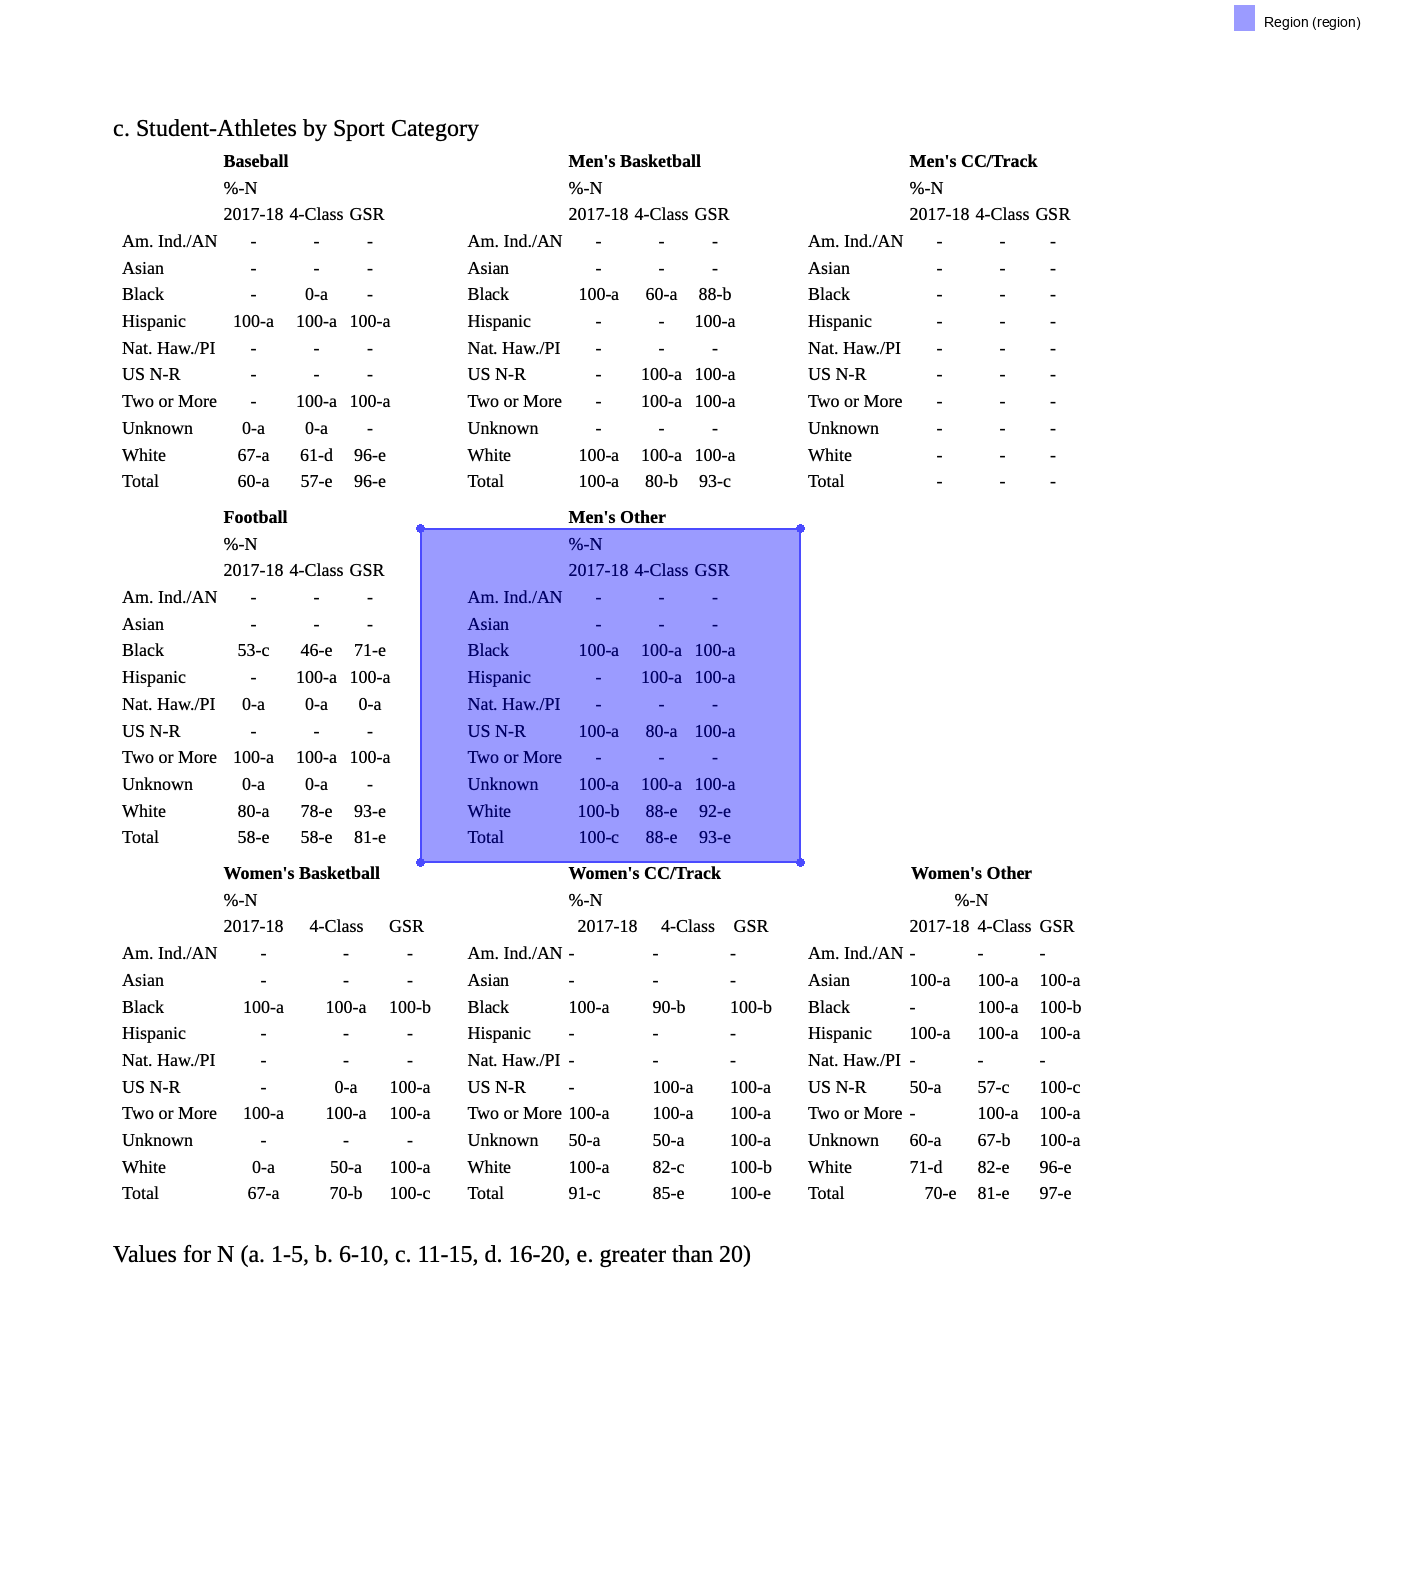

In [98]:
(
    page
    .find("text:contains(\"Men's Other\")")
    .below(
        until="text:contains(\"Women's CC/Track\")",
        include_endpoint=False
    )
    .clip(left=210, right=400)
    .show()
)


In [ ]:
#Building the rest of the bounding boxes

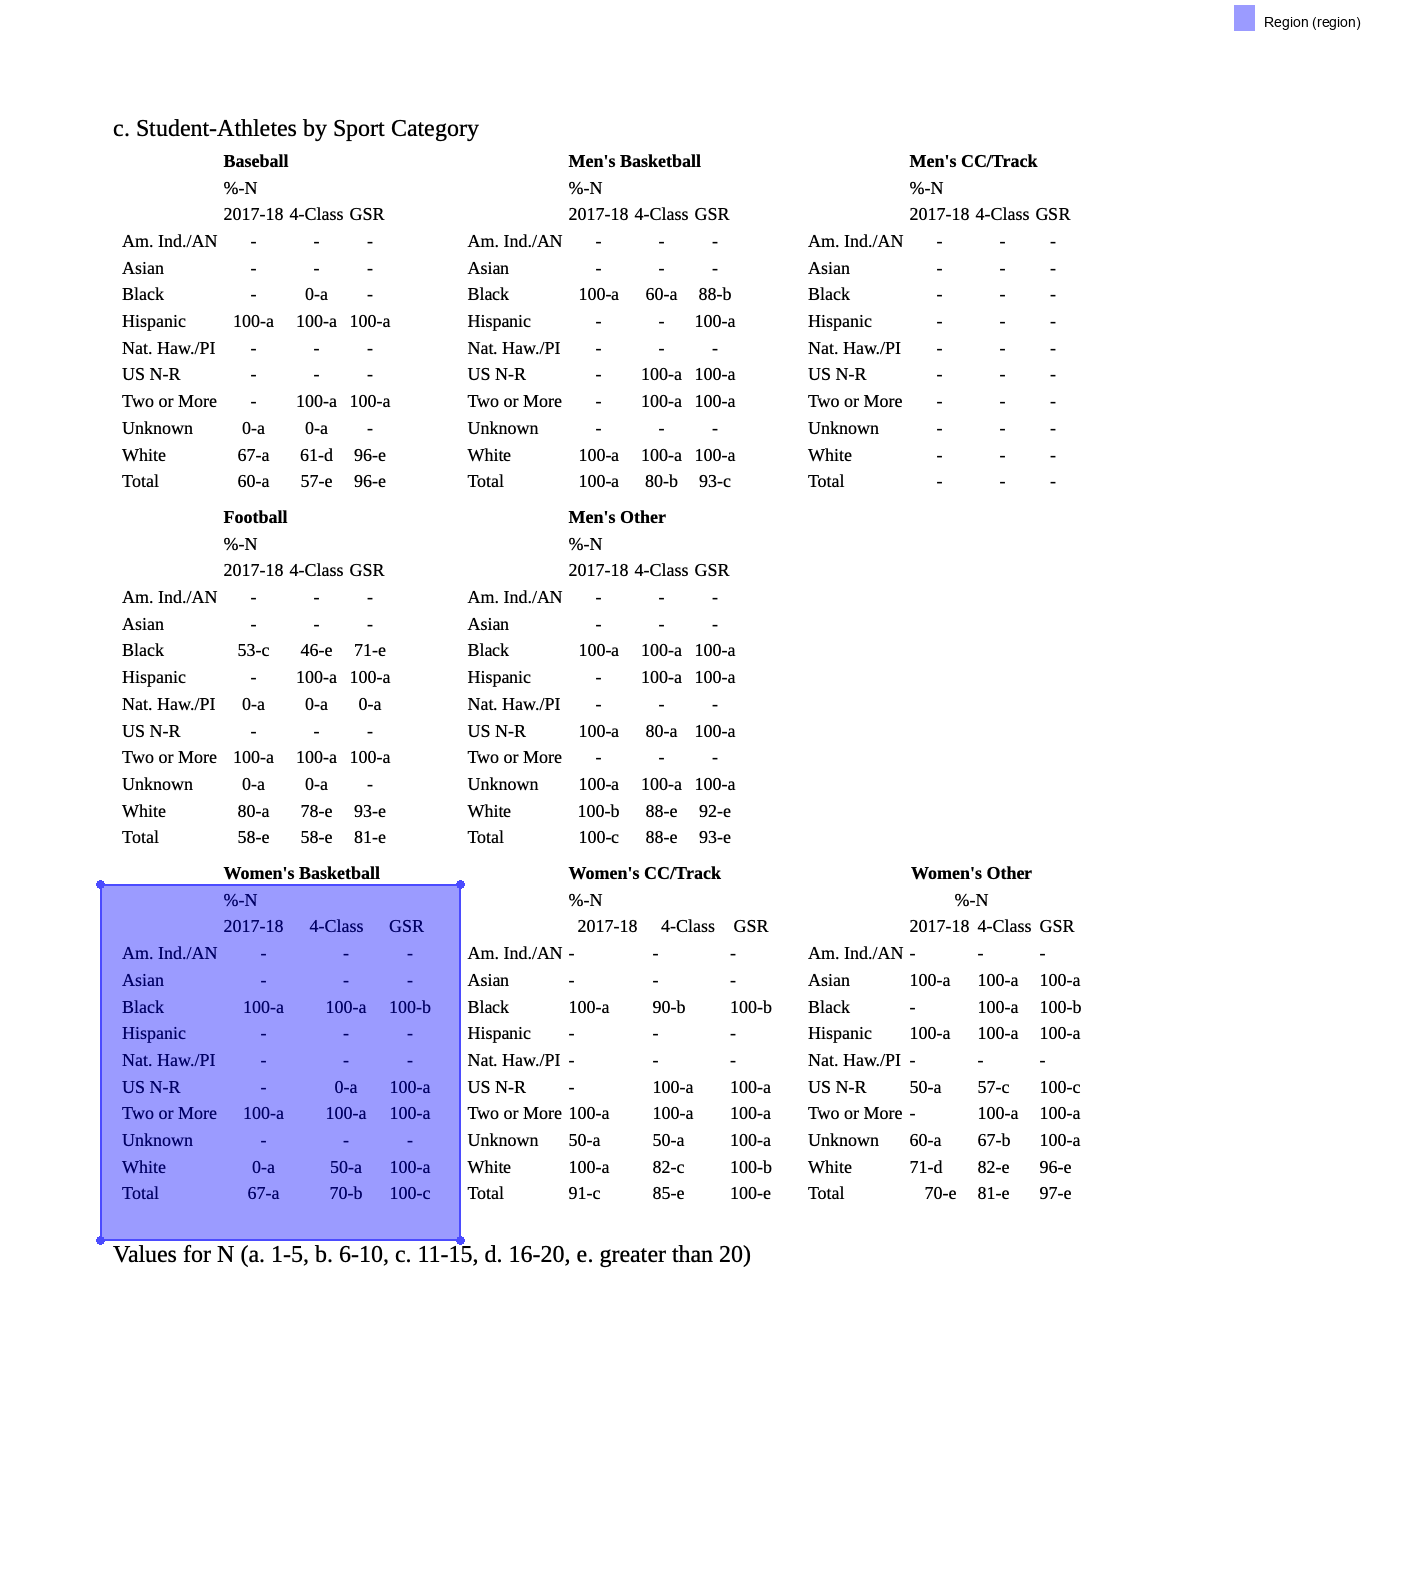

In [101]:
(
    page
    .find("text:contains(\"Women's Basketball\")")
    .below(
        until="text:contains(\"Values\")",
        include_endpoint=False
    )
    .clip(left=50, right=230)
    .show()
)

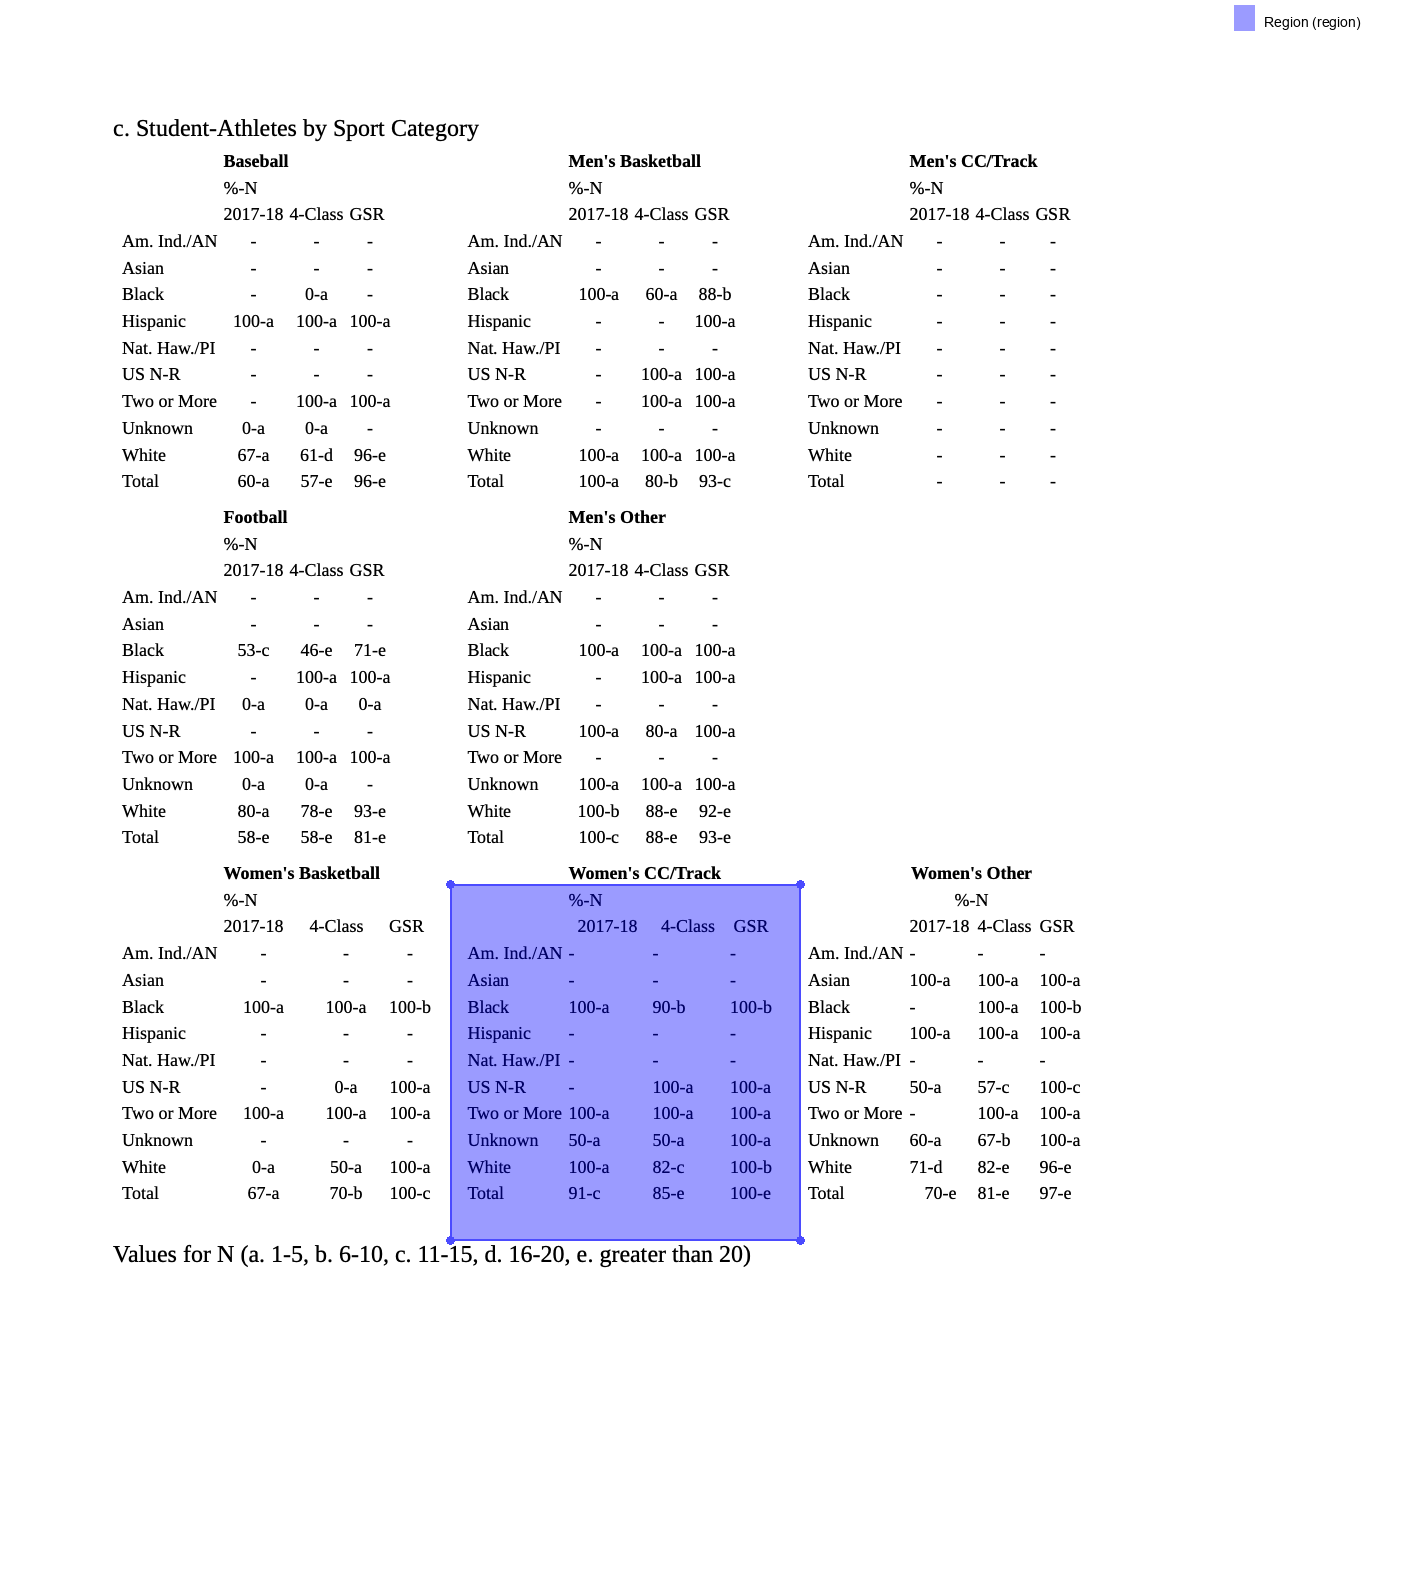

In [106]:
(
    page
    .find("text:contains(\"Women's CC/Track\")")
    .below(
        until="text:contains(\"Values\")",
        include_endpoint=False
    )
    .clip(left=225, right=400)
    .show()
)

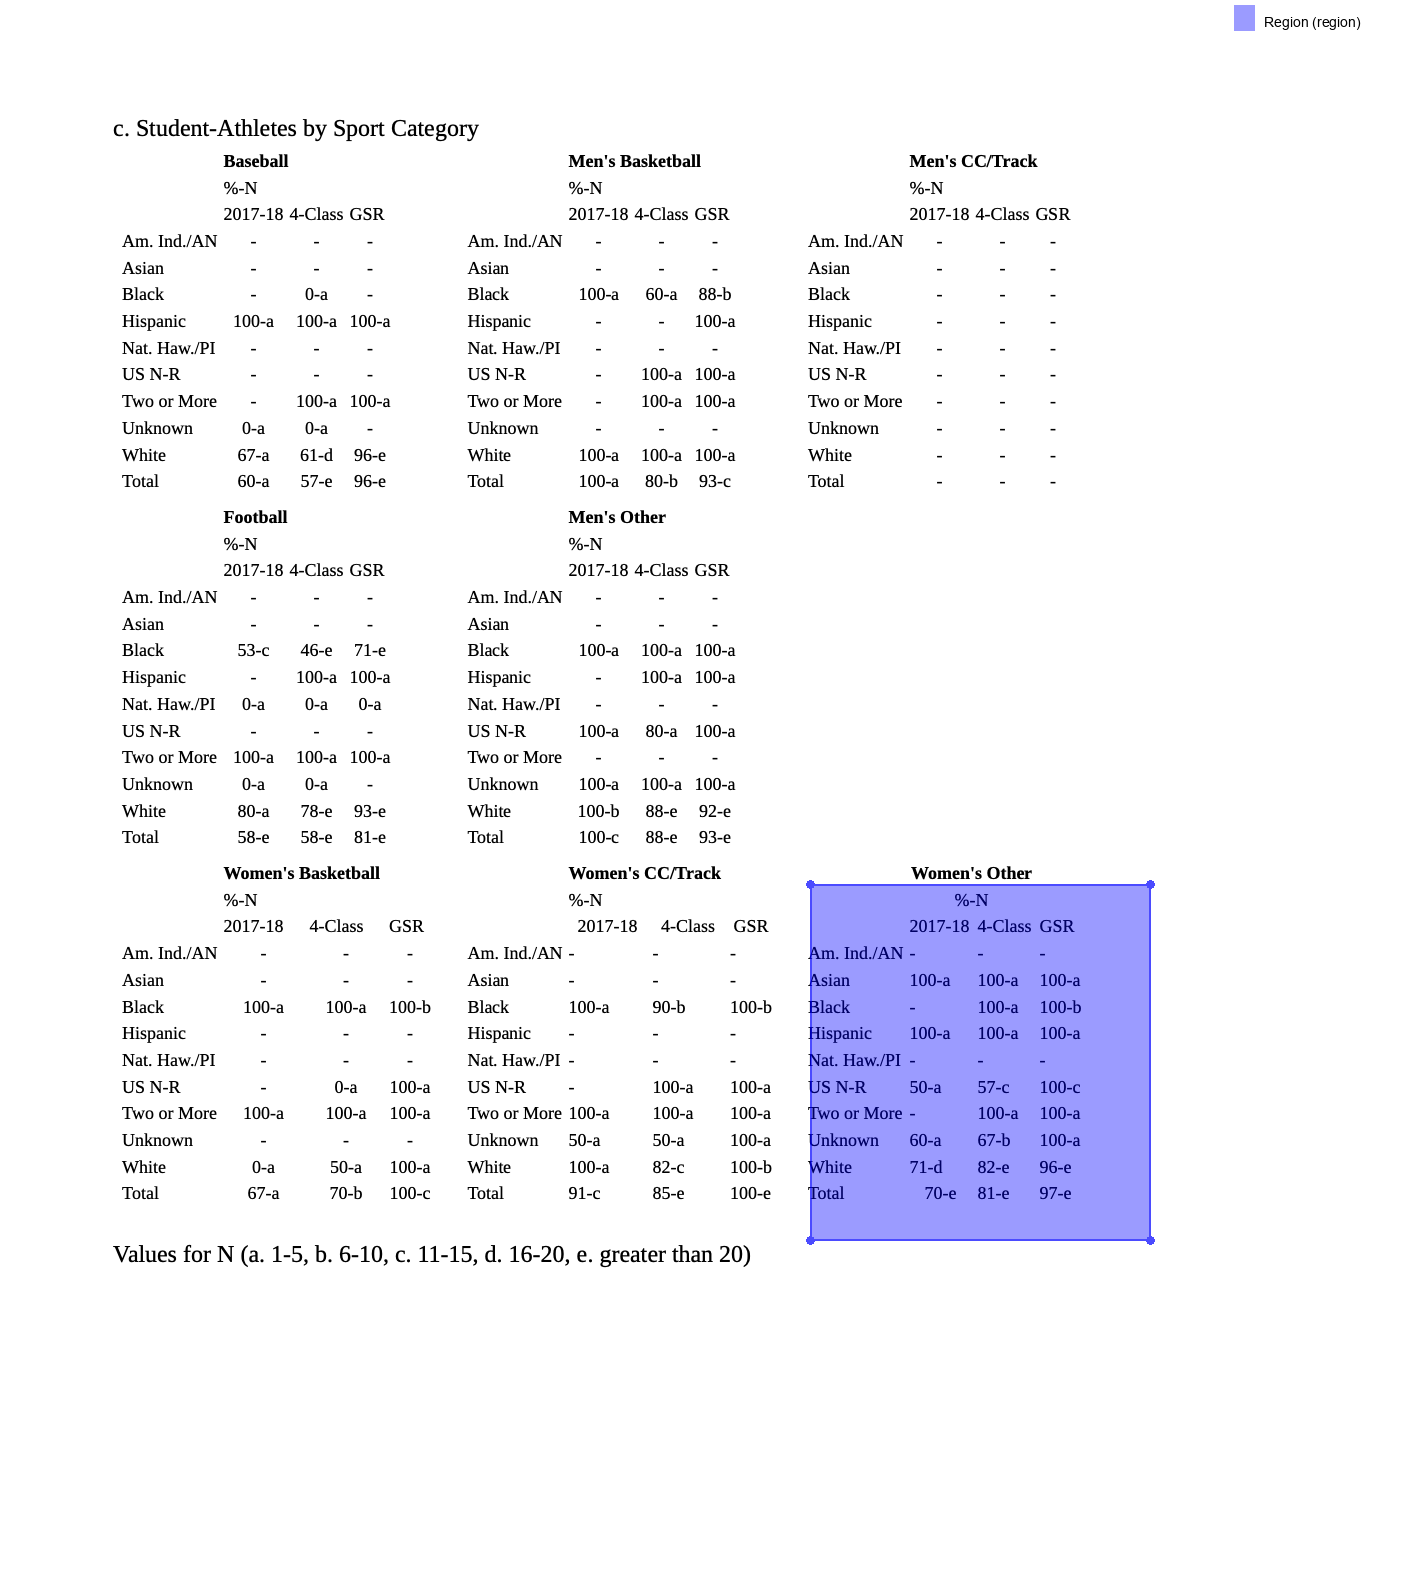

In [105]:
(
    page
    .find("text:contains(\"Women's Other\")")
    .below(
        until="text:contains(\"Values\")",
        include_endpoint=False
    )
    .clip(left=405, right=575)
    .show()
)

In [ ]:
#Test on first 20 to ensure the bounding boxes worked for all the sports at once

In [7]:
SPORT_CLIP_SETTINGS = {
    "Baseball": lambda page: (
        page.find("text:contains('Baseball')")
        .below().find("text:contains('%-N')")
        .below(until="text:contains('Football')", include_endpoint=False)
        .clip(left=50, right=230)
    ),
    "Football": lambda page: (
        page.find("text:contains('Football')")
        .below(until="text:contains(\"Women's Basketball\")", include_endpoint=False)
        .clip(left=50, right=230)
    ),
    "Men's Basketball": lambda page: (
        page.find("text:contains(\"Men's Basketball\")")
        .below(until="text:contains(\"Men's Other\")", include_endpoint=False)
        .clip(left=230, right=400)
    ),
    "Men's Other": lambda page: (
        page.find("text:contains(\"Men's Other\")")
        .below(until="text:contains(\"Women's CC/Track\")", include_endpoint=False)
        .clip(left=210, right=400)
    ),
    "Men's CC/Track": lambda page: (
        page.find("text:contains(\"Men's CC/Track\")")
        .below(until="text:contains(\"Women's Other\")", include_endpoint=False)
        .clip(left=405, right=575)
    ),
    "Women's Basketball": lambda page: (
        page.find("text:contains(\"Women's Basketball\")")
        .below(until="text:contains(\"Values\")", include_endpoint=False)
        .clip(left=50, right=230)
    ),
    "Women's CC/Track": lambda page: (
        page.find("text:contains(\"Women's CC/Track\")")
        .below(until="text:contains(\"Values\")", include_endpoint=False)
        .clip(left=225, right=400)
    ),
    "Women's Other": lambda page: (
        page.find("text:contains(\"Women's Other\")")
        .below(until="text:contains(\"Values\")", include_endpoint=False)
        .clip(left=405, right=575)
    ),
}

def extract_school_name(filename):
    return filename.replace(".pdf", "").replace("_", " ").strip()

def clean_row(row):
    return [cell.strip().replace("\xa0", " ") if isinstance(cell, str) else "" for cell in row]

def extract_all_sports(pdf, school_name):
    page = pdf.pages[1]
    all_rows = []
    for sport, extractor in SPORT_CLIP_SETTINGS.items():
        try:
            table = extractor(page).extract_table()
            if not table or len(table) < 2:
                continue
            for row in table:
                row = clean_row(row)
                row_padded = row[:5] + [""] * (5 - len(row))
                all_rows.append({
                    "School": school_name,
                    "Sport": sport,
                    "Race": row_padded[0],
                    "%N": row_padded[1],
                    "2017-18": row_padded[2],
                    "4-Class": row_padded[3],
                    "GSR": row_padded[4],
                })
        except Exception as e:
            print(f"{sport} failed for {school_name}: {e}")
    return all_rows

# Main loop
pdf_folder = "pdfs"
pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])[:20]
all_data = []

for filename in pdf_files:
    school_name = extract_school_name(filename)
    filepath = os.path.join(pdf_folder, filename)
    try:
        pdf = PDF(filepath)
        if len(pdf.pages) < 2:
            print(f"Skipping {school_name} (too few pages)")
            continue
        data = extract_all_sports(pdf, school_name)
        all_data.extend(data)
        print(f"Finished {school_name}")
    except Exception as e:
        print(f"Failed {school_name}: {e}")

df = pd.DataFrame(all_data)
df.to_csv("page2_all_sports_by_race_first20.csv", index=False)
print("Saved to page2_all_sports_by_race_first20.csv")


Finished 1 - DI CA Test
Baseball failed for 2007 FSR: 'NoneType' object has no attribute 'below'
Finished 2007 FSR
Finished Abilene Christian University
Finished Alabama A&M University
Finished Alabama State University


KeyboardInterrupt: 

In [6]:
SPORT_CLIP_SETTINGS = {
    "Baseball": lambda page: (
        page.find("text:contains('Baseball')")
        .below().find("text:contains('%-N')")
        .below(until="text:contains('Football')", include_endpoint=False)
        .clip(left=50, right=230)
    ),
    "Football": lambda page: (
        page.find("text:contains('Football')")
        .below(until="text:contains(\"Women's Basketball\")", include_endpoint=False)
        .clip(left=50, right=230)
    ),
    "Men's Basketball": lambda page: (
        page.find("text:contains(\"Men's Basketball\")")
        .below(until="text:contains(\"Men's Other\")", include_endpoint=False)
        .clip(left=230, right=400)
    ),
    "Men's Other": lambda page: (
        page.find("text:contains(\"Men's Other\")")
        .below(until="text:contains(\"Women's CC/Track\")", include_endpoint=False)
        .clip(left=210, right=400)
    ),
    "Men's CC/Track": lambda page: (
        page.find("text:contains(\"Men's CC/Track\")")
        .below(until="text:contains(\"Women's Other\")", include_endpoint=False)
        .clip(left=405, right=575)
    ),
    "Women's Basketball": lambda page: (
        page.find("text:contains(\"Women's Basketball\")")
        .below(until="text:contains(\"Values\")", include_endpoint=False)
        .clip(left=50, right=230)
    ),
    "Women's CC/Track": lambda page: (
        page.find("text:contains(\"Women's CC/Track\")")
        .below(until="text:contains(\"Values\")", include_endpoint=False)
        .clip(left=225, right=400)
    ),
    "Women's Other": lambda page: (
        page.find("text:contains(\"Women's Other\")")
        .below(until="text:contains(\"Values\")", include_endpoint=False)
        .clip(left=405, right=575)
    ),
}

def extract_school_name(filename):
    return filename.replace(".pdf", "").replace("_", " ").strip()

def clean_row(row):
    return [cell.strip().replace("\xa0", " ") if isinstance(cell, str) else "" for cell in row]

def extract_all_sports(pdf, school_name):
    page = pdf.pages[1]
    all_rows = []
    for sport, extractor in SPORT_CLIP_SETTINGS.items():
        try:
            table = extractor(page).extract_table()
            if not table or len(table) < 2:
                continue
            for row in table:
                row = clean_row(row)
                row_padded = row[:5] + [""] * (5 - len(row))
                all_rows.append({
                    "School": school_name,
                    "Sport": sport,
                    "Race": row_padded[0],
                    "%N": row_padded[1],
                    "2017-18": row_padded[2],
                    "4-Class": row_padded[3],
                    "GSR": row_padded[4],
                })
        except Exception as e:
            print(f" {sport} failed for {school_name}: {e}")
    return all_rows

pdf_folder = "pdfs"
pdf_files = sorted([f for f in os.listdir(pdf_folder) if f.endswith(".pdf")])
all_data = []

for filename in pdf_files:
    school_name = extract_school_name(filename)
    filepath = os.path.join(pdf_folder, filename)
    try:
        pdf = PDF(filepath)
        if len(pdf.pages) < 2:
            print(f"Skipping {school_name} (too few pages)")
            continue
        data = extract_all_sports(pdf, school_name)
        all_data.extend(data)
        print(f"Finished {school_name}")
    except Exception as e:
        print(f"Failed {school_name}: {e}")

df = pd.DataFrame(all_data)
df.to_csv("page2_all_sports_by_race_all_schools.csv", index=False)
print("Saved to page2_all_sports_by_race_all_schools.csv")

Finished 1 - DI CA Test
 Baseball failed for 2007 FSR: 'NoneType' object has no attribute 'below'
Finished 2007 FSR
Finished Abilene Christian University
Finished Alabama A&M University


KeyboardInterrupt: 